# Twitter Sentiment Analysis

### Loading Data

In [3]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Data Inspection

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [6]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [7]:
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [8]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [9]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [10]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

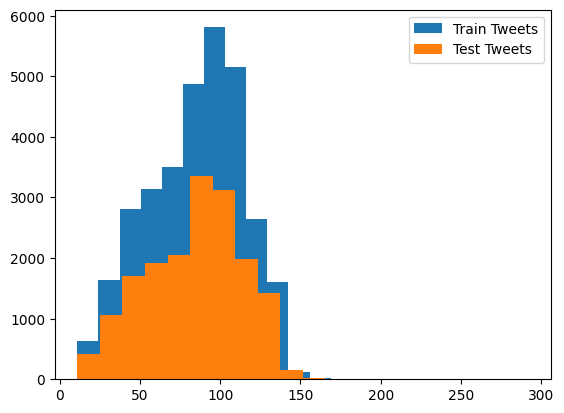

In [11]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label='Train Tweets')
plt.hist(length_test, bins=20, label='Test Tweets')
plt.legend()

### Data Cleaning

In [12]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

In [13]:
def remove_pattern(input_txt, pattern, replace= ''):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,replace,input_txt)
    return input_txt

In [14]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r'@\w*')
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
combi['tidy_tweet'] =  combi['tidy_tweet'].str.replace(r'[^a-zA-Z#]',' ')
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [16]:
combi['tidy_tweet'] =  np.vectorize(re.sub)(r'[^a-zA-Z#]',' ',combi['tidy_tweet'])
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [17]:
combi['tidy_tweet'] =  combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [18]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

### Story Generation

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='viridis', background_color='white')

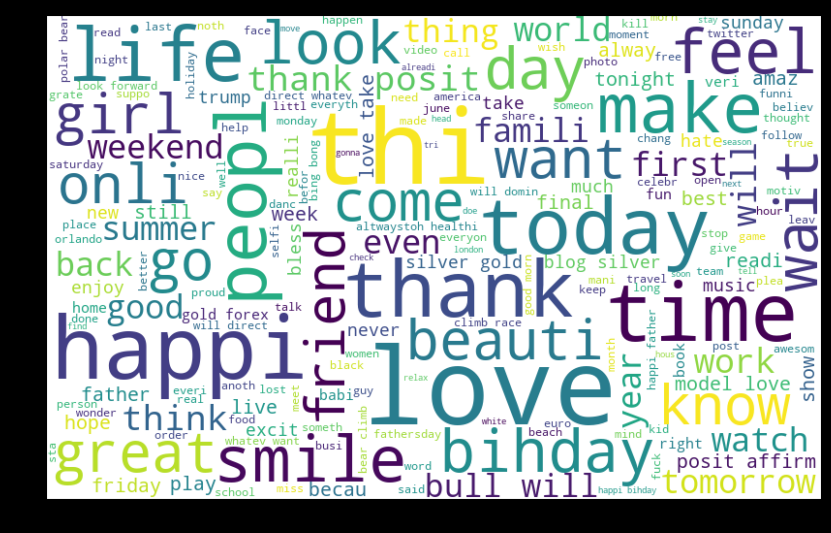

In [23]:
plt.figure(figsize=(10,7), facecolor='k')
plt.imshow(wordcloud.generate(all_words), interpolation='bilinear')
plt.show()

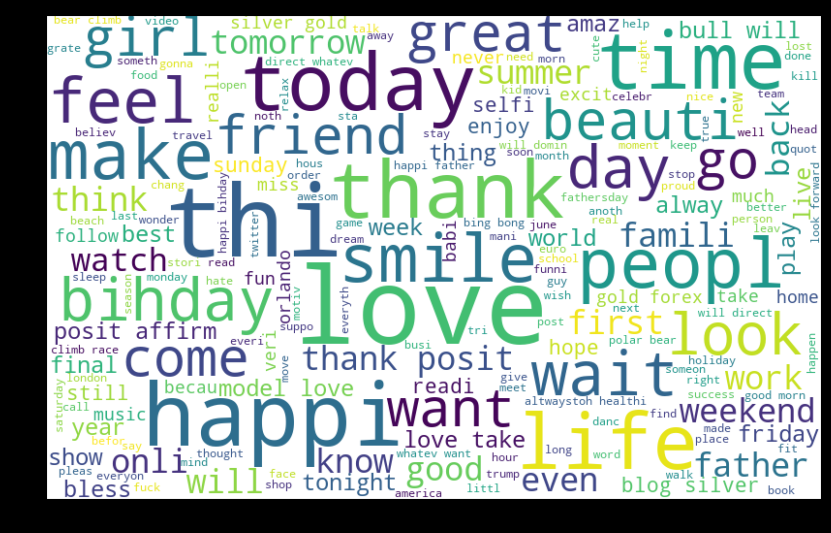

In [24]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
plt.figure(figsize=(10,7), facecolor='k')
plt.imshow(wordcloud.generate(normal_words), interpolation='bilinear')
plt.show()

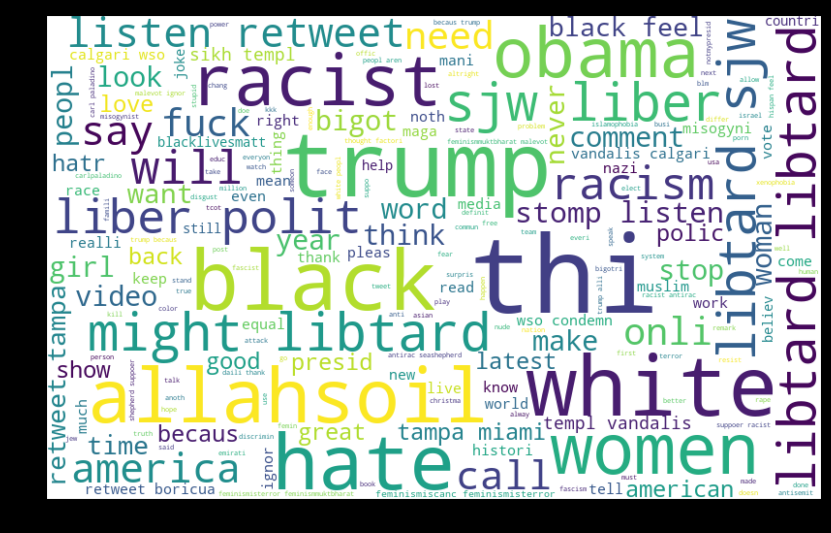

In [25]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
plt.figure(figsize=(10,7), facecolor='k')
plt.imshow(wordcloud.generate(negative_words), interpolation='bilinear')
plt.show()

In [26]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [27]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [28]:
HT_negative =  hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [29]:
HT_regular = sum(HT_regular,[])

In [30]:
HT_negative = sum(HT_negative,[])

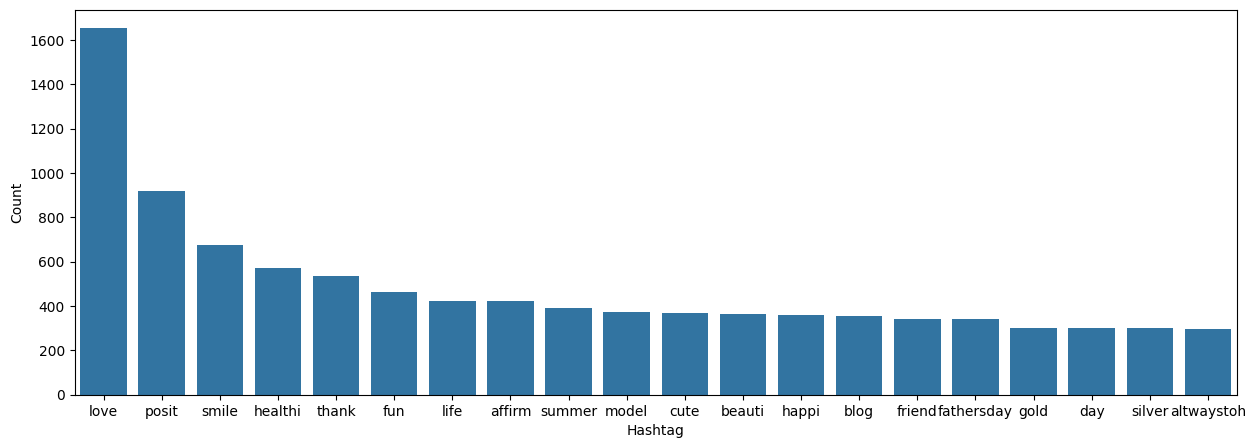

In [31]:
a = nltk.FreqDist(HT_regular)
b = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = b.nlargest(columns="Count", n=20)
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

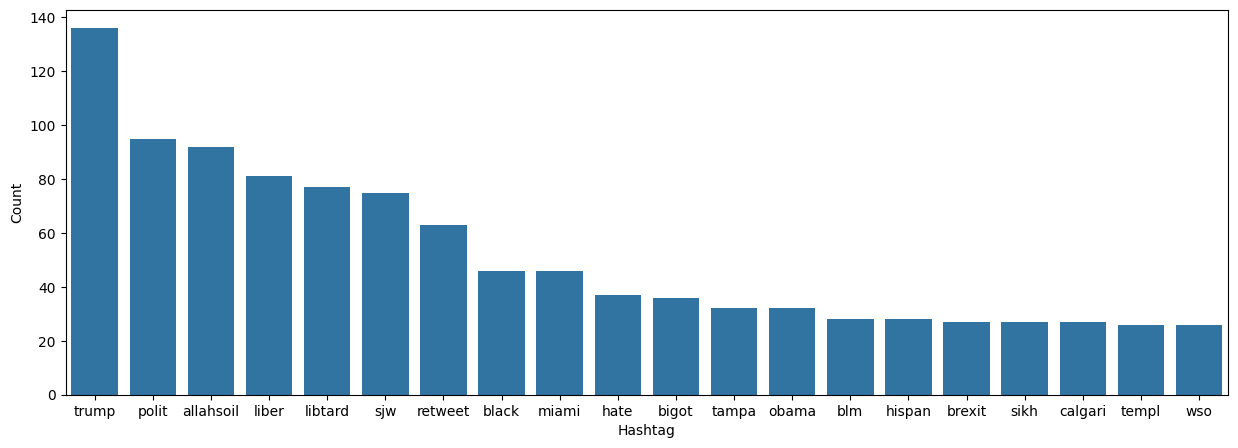

In [32]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(15,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

In [36]:
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [35]:
tfifdf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000,stop_words='english')
tfidf = tfifdf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [38]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(tokenized_tweet, window=5, min_count=2, workers=2, vector_size=200, seed=42, negative=10, hs=2,sg=1)

In [43]:
model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)

(6509825, 7536020)

In [48]:
model_w2v.wv.most_similar(positive='dinner')

[('#bihdaydinn', 0.45315855741500854),
 ('#dnd', 0.4065542221069336),
 ('aladdin', 0.4041799306869507),
 ('#brotherhood', 0.394061803817749),
 ('noodl', 0.3935070335865021),
 ('lunch', 0.390977144241333),
 ('#perfectday', 0.38317713141441345),
 ('#biall', 0.38213229179382324),
 ('hike', 0.3800625503063202),
 ('crockpot', 0.37934812903404236)]

In [49]:
model_w2v.wv.most_similar('trump')

[('donald', 0.5630167722702026),
 ('racist', 0.5399289131164551),
 ('truism', 0.5132615566253662),
 ('embolden', 0.5101649761199951),
 ('hillari', 0.5050151944160461),
 ('raza', 0.5043149590492249),
 ('obama', 0.5003157258033752),
 ('#birdsofafeath', 0.49897125363349915),
 ('#opkkk', 0.4966770112514496),
 ('#foxnewssunday', 0.4914388954639435)]

In [65]:
example = pd.DataFrame(model_w2v.wv['boy','girl','king','queen'], index=['boy','girl','king','queen'])

In [69]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [66]:
# Creating a PCA object with 6 components
pca = PCA(n_components=3)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(example)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = example.index

In [73]:
customer_data_pca.iloc[0]['PC1']

-3.3848374

In [77]:
colors = ['#e8000b', '#1ac938', '#023eff','#ff8c00']

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=[customer_data_pca.iloc[0]['PC1']], y=[customer_data_pca.iloc[0]['PC2']], z=[customer_data_pca.iloc[0]['PC3']], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Boy'))
fig.add_trace(go.Scatter3d(x=[customer_data_pca.iloc[1]['PC1']], y=[customer_data_pca.iloc[1]['PC2']], z=[customer_data_pca.iloc[1]['PC3']], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Girl'))
fig.add_trace(go.Scatter3d(x=[customer_data_pca.iloc[2]['PC1']], y=[customer_data_pca.iloc[2]['PC2']], z=[customer_data_pca.iloc[2]['PC3']], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='King'))
fig.add_trace(go.Scatter3d(x=[customer_data_pca.iloc[3]['PC1']], y=[customer_data_pca.iloc[3]['PC2']], z=[customer_data_pca.iloc[3]['PC3']], 
                           mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='Queen'))
# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Example Word in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

In [78]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [79]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [82]:
from tqdm import tqdm

tqdm.pandas(desc="progress-bar")

from gensim.models.doc2vec import TaggedDocument

In [83]:
def add_label(twt):
    output = []
    for i,x in zip(twt.index, twt):
        output.append(TaggedDocument(x, ["tweet_" + str(i)]))
    return output

In [84]:
labeled_tweet = add_label(tokenized_tweet)

In [86]:
model_d2v = gensim.models.Doc2Vec(vector_size=200, min_count=5, alpha=0.1, workers=3, seed=42, negative=7, hs=2, dm=1, dm_mean=1)

In [87]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweet)])

100%|██████████| 49159/49159 [00:00<00:00, 8150037.17it/s]


In [90]:
model_d2v.train(labeled_tweet, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

In [91]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

## Modeling

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

BOW Features

In [94]:
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

In [96]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [98]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

LogisticRegression()

In [100]:
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.5332225913621262

In [103]:
test_pred = lreg.predict_proba(test_bow)
test_prediction_int = test_pred[:,1] >= 0.3
test_prediction_int = test_prediction_int.astype(int)
test['label'] = test_prediction_int
submission = test[['id', 'label']]
submission.to_csv('submission/sub_lreg_bow.csv', index=False)

Public Score is 0.5688888888888889

TF-IDF Features

In [105]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [106]:
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression()

In [107]:
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.5454545454545454

In [108]:
test_pred = lreg.predict_proba(test_tfidf)
test_prediction_int = test_pred[:,1] >= 0.3
test_prediction_int = test_prediction_int.astype(int)
test['label'] = test_prediction_int
submission = test[['id', 'label']]
submission.to_csv('submission/sub_lreg_tfidf.csv', index=False)

Score is 0.5636942675159236

Word2Vev Features

In [109]:
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc[31962:, :]
x_train_w2v = train_w2v.iloc[ytrain.index,:]
x_valid_w2v = train_w2v.iloc[yvalid.index,:]

In [111]:
lreg.fit(x_train_w2v, ytrain)

LogisticRegression()

In [112]:
prediction = lreg.predict_proba(x_valid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.6262319939347991

In [ ]:
test_pred = lreg.predict_proba(test_w2v)
test_prediction_int = test_pred[:,1] >= 0.3
test_prediction_int = test_prediction_int.astype(int)
test['label'] = test_prediction_int
submission = test[['id', 'label']]
submission.to_csv('submission/sub_lreg_tfidf.csv', index=False)